<a href="https://colab.research.google.com/github/adalves-ufabc/2022.Q2-PLN/blob/main/2022_Q2_PLN_Notebook_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2022.Q2]**
Prof. Alexandre Donizeti Alves

# **Convertendo Texto para *Features***

---

### **01 - *One Hot Encoding***

In [1]:
#----------------------------------------------------
# Converting Text to Features Using One Hot Encoding  
#----------------------------------------------------

# importing the library 
import pandas as pd

text = "Eu estou aprendendo PLN"

# generating the features
pd.get_dummies(text.split())

,Eu,PLN,aprendendo,estou
0,1,0,0,0
1,0,0,0,1
2,0,0,1,0
3,0,1,0,0


### **02 - *Count vectorizer***

A abordagem no exemplo anterior tem uma desvantagem. Não leva em consideração a frequência de uma palavra. Se uma determinada palavra aparecer várias vezes, há uma chance de perder a informação se ela não for incluída na análise. Um vetorizador de contagem (*count vectorizer*) resolverá esse problema.


In [2]:
#-----------------------------------------------------
# Converting text to features using Count Vectorizing 
#-----------------------------------------------------

# importing the function 
from sklearn.feature_extraction.text import CountVectorizer

text = ["Eu amo PLN e eu irei aprender pln em 3 meses"]

# create the transform
vectorizer = CountVectorizer()

# tokenizing
vectorizer.fit(text)

# encode document
vector = vectorizer.transform(text)

# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

{'eu': 3, 'amo': 0, 'pln': 6, 'irei': 4, 'aprender': 1, 'em': 2, 'meses': 5}
[[1 1 1 2 1 1 2]]


### **03 - *N-grams***

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
#--------------------
# Generating N-grams 
#--------------------

# Generating N-grams using TextBlob

text = "Eu estou aprendendo PLN"

# import textblob
from textblob import TextBlob

# for unigram : use n = 1
TextBlob(text).ngrams(1)

[WordList(['Eu']),
 WordList(['estou']),
 WordList(['aprendendo']),
 WordList(['PLN'])]

In [5]:
# for bigrams, use n = 2 
TextBlob(text).ngrams(2)

[WordList(['Eu', 'estou']),
 WordList(['estou', 'aprendendo']),
 WordList(['aprendendo', 'PLN'])]

In [6]:
# Bigram-based features for a document

# importing the function 
from sklearn.feature_extraction.text import CountVectorizer

# text
text = ["Eu amo PLN e eu irei aprender PLN em 3 meses"]

# create the transform
vectorizer = CountVectorizer(ngram_range=(2, 2))

# tokenizing
vectorizer.fit(text)

# encode document
vector = vectorizer.transform(text)

# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

{'eu amo': 3, 'amo pln': 0, 'pln eu': 7, 'eu irei': 4, 'irei aprender': 5, 'aprender pln': 1, 'pln em': 6, 'em meses': 2}
[[1 1 1 1 1 1 1 1]]


### **04 - *Co-occurrence matrix***

Uma matriz de co-ocorrência é como um vetorizador de contagem, onde conta a ocorrência das palavras juntas, em vez de palavras individuais

In [7]:
#---------------------------------
# Generating Co-occurrence Matrix 
#---------------------------------

import numpy as np 
import nltk
from nltk import bigrams    
import itertools

def co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_to_index = { word:i for i, word in enumerate(vocab) }

    # create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
    
    # frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))

    # initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))

    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_to_index[current]
        pos_previous = vocab_to_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count 
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)

    # return the matrix and the index
    return co_occurrence_matrix, vocab_to_index

In [8]:
# sentences for testing

sentences = [['I', 'love', 'nlp'],
			       ['I', 'love','to', 'learn'],
			       ['nlp', 'is', 'future'],
			       ['nlp', 'is', 'cool']]

# create one list using many lists
merged = list(itertools.chain.from_iterable(sentences))
merged

['I',
 'love',
 'nlp',
 'I',
 'love',
 'to',
 'learn',
 'nlp',
 'is',
 'future',
 'nlp',
 'is',
 'cool']

In [9]:
matrix, vocab_to_index = co_occurrence_matrix(merged)
print( matrix )
print( vocab_to_index )
print( matrix[0] )


[[0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 2. 0. 0. 0.]]
{'is': 0, 'learn': 1, 'nlp': 2, 'cool': 3, 'I': 4, 'future': 5, 'to': 6, 'love': 7}
[[0. 0. 2. 0. 0. 0. 0. 0.]]


In [10]:
# generate the matrix
CoMatrixFinal = pd.DataFrame(matrix, columns=vocab_to_index, index=vocab_to_index)
print(CoMatrixFinal)

         is  learn  nlp  cool    I  future   to  love
is      0.0    0.0  2.0   0.0  0.0     0.0  0.0   0.0
learn   0.0    0.0  0.0   0.0  0.0     0.0  1.0   0.0
nlp     0.0    1.0  0.0   0.0  0.0     1.0  0.0   1.0
cool    1.0    0.0  0.0   0.0  0.0     0.0  0.0   0.0
I       0.0    0.0  1.0   0.0  0.0     0.0  0.0   0.0
future  1.0    0.0  0.0   0.0  0.0     0.0  0.0   0.0
to      0.0    0.0  0.0   0.0  0.0     0.0  0.0   1.0
love    0.0    0.0  0.0   0.0  2.0     0.0  0.0   0.0


### **05 - *Hash vectorizer***

No entanto, um vetorizador de contagem e uma matriz de coocorrência têm uma limitação. Nestes métodos, o vocabulário pode se tornar muito grande e causar problemas de memória/computação.

Vetorizador Hash (*Hash Vectorizer*) é eficiente em termos de memória e, em vez de armazenar os tokens como strings, o vetorizador aplica   hashing para codificá-los como índices numéricos.

In [14]:
from sklearn.feature_extraction.text import HashingVectorizer

# list of text documents
text = ["A ligeira raposa marrom saltou sobre o cachorro preguiçoso."]

# transform
vectorizer = HashingVectorizer(n_features=10)

# create the hashing vector
vector = vectorizer.transform(text)

# summarize the vector
print(vector.shape)
print(vector.toarray())

(1, 10)
[[-0.30151134  0.         -0.60302269 -0.30151134 -0.30151134  0.
   0.          0.60302269  0.          0.        ]]


### **06 - *Term Frequence-Inverse Document Frequency (TF-IDF)***

In [15]:
#------------------------------------------
# Converting Text to Features Using TF-IDF 
#------------------------------------------

# import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

text = ["A ligeira raposa marrom saltou sobre o cachorro preguiçoso.",
        "O cachorro.",
        "A raposa"]

# create the transform
vectorizer = TfidfVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'ligeira': 1, 'raposa': 4, 'marrom': 2, 'saltou': 5, 'sobre': 6, 'cachorro': 0, 'preguiçoso': 3}
[1.28768207 1.69314718 1.69314718 1.69314718 1.28768207 1.69314718
 1.69314718]


In [19]:
tfidf_matrix = vectorizer.fit_transform(text);
df = pd.DataFrame(tfidf_matrix.toarray(), columns = vectorizer.get_feature_names_out())
print(df)

   cachorro   ligeira    marrom  preguiçoso    raposa    saltou     sobre
0  0.306504  0.403016  0.403016    0.403016  0.306504  0.403016  0.403016
1  1.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000
2  0.000000  0.000000  0.000000    0.000000  1.000000  0.000000  0.000000


**Referência**:

Capítulo 3: *Converting Text to Features*

https://www.apress.com/br/book/9781484242667

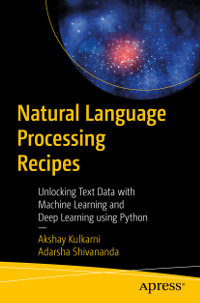